
# TP Matrices et Vecteurs: un peu d'algèbre linéaire

Durant cette séance nous nous intéressons à la manipulation de matrices et de vecteurs et nous aborderons des concepts généraux en algèbre linéaire.

## Introduction

### Matrices
Tout d'abord notons que la création d'une matrice $A$ de dimension $m \times n$ en Sage s'obtient par la commande 

`A=matrix(m,n,[[ligne1],[ligne2],...,lignem]])`

ou m est le nombre de ligne et n le nombre d'éléments dans une ligne (autrement dit n est le nombre de colonne). Par défaut, les éléments de cette matrice seront considérés dans le domaine de définition des éléments passé dans les lignes. Si m et n sont spécifiés on peut simplement donner une seule liste de valeurs (pas besoin de liste de liste).

- si les éléments sont différents, la coercion de type la plus englobante sera utilisée
- si on souhaite un type particulier, on spécifit le domaine des définitions des éléments comme premier argument

### Vecteurs
Cela marche de manière identique pour les vecteurs avec la commande

`vector([e1,e2,...,em])`

Les vecteurs ne sont pas orientés, ils sont à la fois ligne et colonnes, le choix se fera selon le contexte. 
Si l'on souhaite créer des vecteurs d'une certaine dimension il faudra toujours donner le domaine de définition des coefficients.

`vector(DD, [e1,e2,...,em])` ou `vector(DD,m)`

Si l'on souhaite orienter un vecteur, il suffira de créer une matrice à 1 ligne ou 1 colonne. 

## Multiplication

L'operateur `*` permet de faire la multiplication des matrices et des vecteurs comme suit:
- un vecteur ligne avec un matrice: `v*A`
- une matrice avec un vecteur colonne: `A*v`
- un vecteur ligne avec un vecteur colonne (produit scalaire): `v1*v2`
- un vecteur colonne avec un vecteur ligne (produit ouvert): `v2*v1`
- un vecteur ou une matrice avec un scalaire : `a*A` ou `a*v` 

### Question
À partir des matrices et des vecteurs suivants donner tous les produits possibles et afficher le domaine parmi (`ZZ`,`QQ`,`SR`) dans lequel a été effectué le calcul
$$
A=\begin{pmatrix} 1&2&3\\4&5&6\end{pmatrix}, B=\begin{pmatrix} 3&6&9\\1&2&4\\1&2&3\end{pmatrix}, u=\begin{pmatrix} 1&x&x^2 \end{pmatrix}, v=\begin{pmatrix} 8\\5 \\ 7/3\end{pmatrix}
$$


In [1]:
A=matrix(2,3,[[1,2,3],[4,5,6]])
B=matrix(3,3,[[3,6,9],[1,2,4],[1,2,3]])
u=vector([1,x,x**x])
v=vector([8,5,7/3])

show(A.base_ring())
show(B.base_ring())
show(u.base_ring())
show(v.base_ring())

show(A*v)
show(A*B)

Integer Ring

Integer Ring

Symbolic Ring

Rational Field

(25, 71)

[ 8 16 26]
[23 46 74]

## Combinaison linéaire de vecteurs

Si on considère un ensemble de vecteurs colonnes $v_1,\dots,v_m$ tous de dimension $n$, et un ensemble de scalaires $\alpha_1,\dots, \alpha_m$, le calcul de la combinaison linéaire
$$
u = \alpha_1v_1+\alpha_2v_2+\dots+\alpha_mv_m
$$
est équivalent au calcul du produit d'une matrice $A$ de $n$ lignes et $m$ colonnes par un vecteur colonne de dimension $m$
$$
u=
\begin{pmatrix}
 &&&\\
 v_1 & v_2 & \dots& v_m\\
 &&&\\\
\end{pmatrix}
\begin{pmatrix}
\alpha_1 \\ \alpha_2 \\ \vdots \\\alpha_m
\end{pmatrix}
$$

### Question

Calculer la combinaison linéaire suivante :
$$
3 * \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} +
4 * \begin{pmatrix} 2 \\ 3 \\ 4 \end{pmatrix} +
5 * \begin{pmatrix} 3 \\ 4 \\ 5 \end{pmatrix} 
$$
en construisant la matrice $A$ et le vecteur colonne $v_1$ adéquat puis en faisant le produit $A\times v_1$. 

Vous ferez le même calcul en construisant la matrice $B$ adéquate et le vecteur ligne $v_2$ en faisant le produit $v_2\times B$. 

Vérifiez que $v_1$ et $v_2$ contienne bien les mêmes valeurs mais qu'ils ne sont pas identiques.

In [2]:
A=matrix(3,3,[[1,2,3],[2,3,4],[3,4,5]])
v=vector([3,4,5])

show(A)
show(v)
show(A*v)

B=matrix(3,3,[[1,2,3],[2,3,4],[3,4,5]])
v2=vector([3,4,5])

show(v2*B)

[1 2 3]
[2 3 4]
[3 4 5]

(3, 4, 5)

(26, 38, 50)

(26, 38, 50)

### Transposition de matrice/vecteur

Les vecteurs $v_1$ et $v_2$ de la question précédente ne sont pas identique car  ils sont orientés différemment: un est en ligne alors que l'autre est en colonne. On dit qu'ils sont transposé l'un de l'autres.

L'opération de tranposition d'un vecteur est donc le changement d'orientation. Cette notion s'étend aux matrices en considérant qu'une matrice est une collection de vecteurs (soit en ligne, soit en colonne, les deux chois sont possibles). Par conséquent la tranposition d'une matrice consiste à transposer les vecteurs la consistuant.

$$
A=
\begin{pmatrix}
 &&&\\
 v_1 & v_2 & \dots& v_m\\
 &&&\\\
\end{pmatrix}
 \rightarrow
 A^T= \begin{pmatrix}
 v_1^T \\ v_2^T \\ \vdots \\ v_m^T\\
\end{pmatrix}
$$

### Question

Essayer de trouver une propriété sur la transposition d'un produit en utilisant le fait que le vecteur $Av_1$ et $v_2B$ sont transposés l'un de l'autre. Si vous ne trouvez pas regarder sur Wikipédia.

Réponse: (A*B)^T == B^T *A^T

## Résolution de systèmes d'équations linéaires

La résolution d´équation linéaire est une des opérations fondamentale en algèbre linéaire, et cela s'exprime facilement via la notion de produit matrice-vecteur. En effet, si l'on pose le système d'équation suivant:
\begin{equation}
\begin{cases}
6x+5y-z=3\\
2x-5+7z=-8\\
x+y+z=3
\end{cases}
\end{equation}
on peut ré-éxprimer ce problème sous forme matricielle:
$$
\begin{pmatrix}
6 & 5 & -1\\
2 & -5 & 7\\
1 & 1 & 1 \\
\end{pmatrix}
\begin{pmatrix}x\\y\\z\end{pmatrix}
= \begin{pmatrix} 3\\-8\\3 \end{pmatrix}
$$

Pour résoudre un système d'équation linéaire donnéer par l'équation matricielle $Ax=b$,  il suffit d'appeler la méthode `A.solve_right(b)`. Si l'on souhaite résoudre à gauche $xA=b$, on appelle `A.solve_left(b)`.

### Question

Trouver une solution au système donnée ci-dessus.
- en cherchant une solution dans les rationnels
- en redéfinissant le système sur le corps finis $GF(5)$. Attention, lisez bien les messages obtenus, surtout la dernière ligne.

In [3]:
A=matrix(QQ,3,3,[[6,5,-1],[2,-5,7],[1,1,1,]])

B=matrix(QQ,3,1,[3,-8,3])

show(A.solve_right(B))

[ -17/9]
[173/54]
[ 91/54]

In [4]:
A=matrix(GF(5),3,3,[[6,5,-1],[2,-5,7],[1,1,1,]])

B=matrix(GF(5),3,1,[3,-8,3])

show(A.solve_right(B))

[2]
[2]
[4]

### Question

En utilisant la méthode `solve_right` des matrices trouver l'équation des droites $y=\alpha x + \beta $ qui passe par les points:
- $(0,0)$ et $(3,5)$
- $(-1,2)$ et $(7,-3)$

Vous chercherez $\alpha$ et $\beta$ dans les rationnels et vous vérifierez vos résultats en utilisant la fonction plot sur l'intervalle $[-10,10]$.

(5/3, 0)

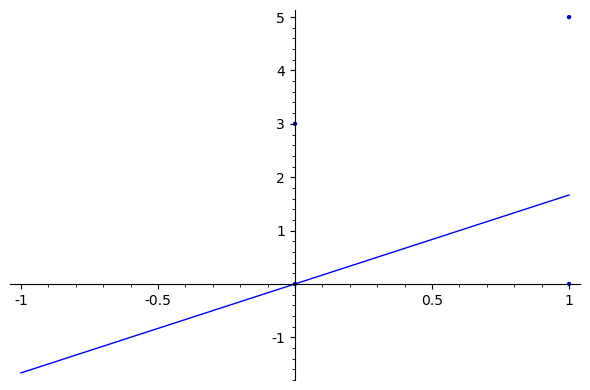

In [5]:
F1=matrix(2,2,[[0,1],[3,1]])
vy=vector([0,5])

show(F1.solve_right(vy))
F1(x)=F1.solve_right(vy)[0]*x + F1.solve_right(vy)[1]

show(plot(F1(x)) + list_plot([0,0]) + list_plot([3,5]))

### Interpolation de polynômes

De manière plus générale, si on se donne un ensemble de $d$ points $(x_i,y_i)$ deux à deux distinct et que l'on cherche l'unique polynôme $P(x)=p_0+p_1x+p_2x^2+\dots + p_{d-1}x^{d-1}$ qui passe par tout ces points, cela se ramène comme précédemment à une résolution de système linéaire.

En effet, on peut poser le système linéaire suivant pour trouver les coefficient $p_i$ de $P(x)$.
$$
\begin{pmatrix}
1 & x_1 & x_1^2 & x_1^3 & \dots & x_1^{d-1} \\
1 & x_2 & x_2^2 & x_2^3 & \dots & x_2^{d-1} \\
\vdots & \vdots & \vdots & \vdots& \ddots & \vdots\\
1 & x_d & x_d^2 & x_d^3 & \dots & x_d^{d-1} \\
\end{pmatrix}
\begin{pmatrix}
p_0 \\p_1 \\ p_2 \\ \vdots \\ p_{d-1} 
\end{pmatrix}
= 
\begin{pmatrix}
y_1 \\y_2 \\ y_3 \\ \vdots \\ y_{d} 
\end{pmatrix}
$$

### Question

Trouver le polynômes de degrès 4 à coefficient rationnels qui passe par les points suivants:
$$(-2,3),(-1,7),(0,4),(3,1),(5,5)$$

Vous afficherez les points ainsi que la fonction $f(x)$ correspondant au polynôme pour $x \in [-3,7]$.
Vou afficherez également le polynôme.

(4, -148/35, -19/60, 4/5, -47/420)

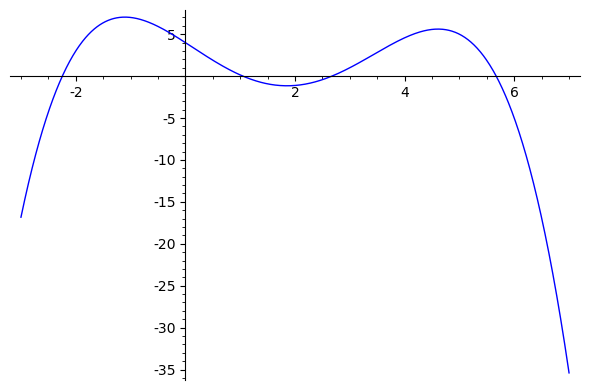

In [6]:
Mat=matrix([[1,(-2)**1,(-2)**2,(-2)**3,(-2)**4],[1,(-1)**1,(-1)**2,(-1)**3,(-1)**4],[1,(0)**1,(0)**2,(0)**3,(0)**4],[1,(3)**1,(3)**2,(3)**3,(3)**4],[1,(5)**1,(5)**2,(5)**3,(5)**4]])
Vect=vector([3,7,4,1,5])

show(Mat.solve_right(Vect))
MatSol0 = Mat.solve_right(Vect)[0]
MatSol1 = Mat.solve_right(Vect)[1]
MatSol2 = Mat.solve_right(Vect)[2]
MatSol3 = Mat.solve_right(Vect)[3]
MatSol4 = Mat.solve_right(Vect)[4]


F2(x)=MatSol0 + MatSol1*x + MatSol2*(x**2) + MatSol3*(x**3) + MatSol4*(x**4)

show(plot(F2,-3,7))

## Méthode des moindres carrés


Si l'on considère le système d'équation linéaires données par l'égalité matricielle $Ax=b$ avec $A$ une matrice constituée de $m$ lignes et de $n<m$ colonnes. Il n'existe pas de manière générale une solution $x$ à cette égalité. Toutefois, on s'intéresse à trouver un vecteur $x$ tel que $Ax$ soit au plus proche de $b$. Pour cela on va utiliser la norme Euclidienne des vecteurs : soit $v=[v_1 v_2 \dots v_n]$ alors sa norme Euclidienne est  $|| v||_2 = \sqrt{v*v}=\sqrt{v_1^2+v_2^2+\dots+v_n^2}$.

Ainsi notre problème se ramène à trouver le vecteur $x$ qui minimise $|| Ax-b||_2$.

Si la matrice $A$ a de bonnes propriétés (de rang maximal), alors la solution $x$ peut se calculer avec la résolution d'un autre système linéaire $Hx=c$ avec :
- $H=A^TA$
- $c=A^Tb$

### Question

En reprenant notre exemple précédent sur le calcul d'une droite  le problème revient à trouver l'équation d'un droite $y=\alpha x+\beta$ qui passe par plus que 2 points. Bien entendu si les points ne sont pas alignés, il n'y a pas de solution. La méthode des moindres carrées permet ici de trouver l'équation d'une droite qui minimise l'écart entre la droite et les points.

Trouver quelle est la droite qui est la plus proche des points suivants:
$(-10, -37), (-6, -7), (-2, -21), (2, 9), (6, 3)$
Vous afficherez les points ainsi que la droite trouvée.


In [7]:
Mat=matrix([[1,-10],[1,-6],[1,-2],[1,2],[1,6]])
Vect=vector([-37,-7,-21,9,3])

# Mat.solve_right(Vect) -> no solutions

[  1 -10]
[  1  -6]
[  1  -2]
[  1   2]
[  1   6]

[  5 -10]
[-10 180]

(-29/5, 12/5)

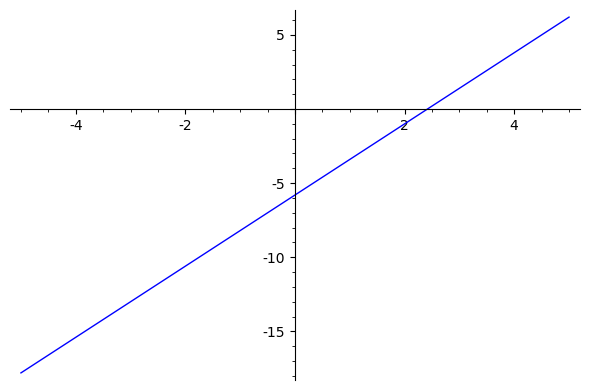

In [8]:
H = Mat.transpose() * Mat
c = Mat.transpose() * Vect
show(Mat)
show(H)

show(H.solve_right(c))

F3(x) = H.solve_right(c)[1]*x + H.solve_right(c)[0]
show(plot(F3,-5,5))

### Question

Faite la même chose pour trouver un polynôme de degrès 3 qui est le plus proche des points suivants:
$(-2,3),(-1,7),(0,4),(3,1),(4,4),(5,5)$

Comme précémment vous afficherez les points ainsi que la fonction  𝑓(𝑥)  correspondant au polynôme pour  $𝑥∈[−3,7]$.

In [9]:
def euclide(v):
    res = 0
    for i in range(len(v.rows())):
        res += (v[i][0])^2
    return sqrt(res)

A = matrix(QQ, 6, 4, [(-2)**3, (-2)**2, (-2), 1, (-1)**3, (-1)**2, (-1), 1, 0, 0, 0, 1, 3^3, 3^2, 3, 1, 4^3, 4^2, 4, 1, 5^3, 5^2, 5, 1])
b = matrix(QQ, 6, 1, [3, 7, 4, 1, 4, 5])
            
A_t = A.transpose()
H = A_t * A
c = A_t * b

pt_x = H.solve_right(c)
res = A*pt_x - b
show(A,"*",pt_x,"-",b,"=",res)
print("norme euclidienne =",euclide(res),"~=",euclide(res).n(20))



[ -8   4  -2   1]
[ -1   1  -1   1]
[  0   0   0   1]
[ 27   9   3   1]
[ 64  16   4   1]
[125  25   5   1] '*' [    209/1530]
[  -1603/3230]
[-12094/14535]
[    4927/969] '-' [3]
[7]
[4]
[1]
[4]
[5] '=' [  650/969]
[-1663/969]
[ 1051/969]
[  785/969]
[-1397/969]
[  574/969]

norme euclidienne = 2*sqrt(1855/969) ~= 2.7672


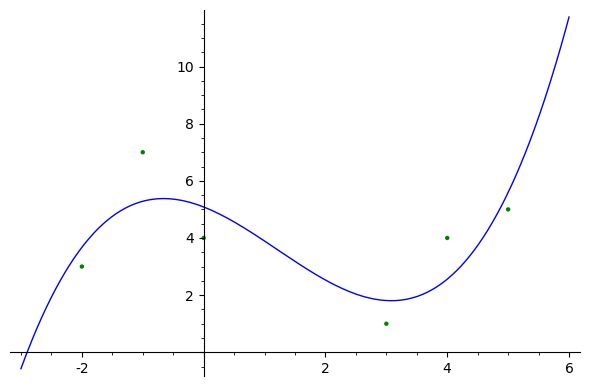

In [10]:
aff = plot(pt_x[0][0]*(x^3) + pt_x[1][0]*(x**2) + pt_x[2][0]*x + pt_x[3][0], (x, -3, 6))
aff += point([-2, 3], color="green")
aff += point([-1, 7], color="green")
aff += point([0, 4], color="green")
aff += point([3, 1], color="green")
aff += point([4, 4], color="green")
aff += point([5, 5], color="green")
aff

## Réécriture d'un vecteur à partir d'autres vecteurs.
Étant donné un ensemble de vecteur $v_1,\dots,v_n$ on peut se poser la question de savoir si il est possible d'écrire un autre vecteur $u$ à partir de combinaison linéaire des vecteurs $v_i$. 


### question
On considére les vecteurs à coefficients dans le corps finis à 3 éléments (`GF(3)` en Sage est équivalement aux entiers modulo 3) donnés ci-dessous
$$
v_1=\begin{pmatrix} 0 \\ 1 \\2 \end{pmatrix},
v_2=\begin{pmatrix} 1 \\ 0 \\1 \end{pmatrix},
v_3=\begin{pmatrix} 1 \\ 1 \\1 \end{pmatrix}
$$

Construisez la liste des vecteurs qui peuvent s'écrire comme combinaison linéaire de $v_1,v_2,v_3$, câd tous les vecteurs $\alpha_1 v_1 +\alpha_2  v_2 + \alpha_3 v_3$ avec $\alpha_1,\alpha_2,\alpha_3$ des scalaires dans $\{0,1,2\}$. Attention, les calculs doivent se faire modulo 3 et il faut éviter les doublons. Combien de vecteurs trouvez vous ?


In [11]:
v1=vector([0,1,2])
v2=vector([1,0,1])
v3=vector([1,1,1])
cl=[]
for a1 in GF(3) :
    for a2 in GF(3) :
        for a3 in GF(3) :
            vtmp= v1*a1 + v2*a2 + v3*a3
            if(cl.count(vtmp) <= 0):
                cl.append(vtmp)

show(cl)


[(0, 0, 0),
 (1, 1, 1),
 (2, 2, 2),
 (1, 0, 1),
 (2, 1, 2),
 (0, 2, 0),
 (2, 0, 2),
 (0, 1, 0),
 (1, 2, 1),
 (0, 1, 2),
 (1, 2, 0),
 (2, 0, 1),
 (1, 1, 0),
 (2, 2, 1),
 (0, 0, 2),
 (2, 1, 1),
 (0, 2, 2),
 (1, 0, 0),
 (0, 2, 1),
 (1, 0, 2),
 (2, 1, 0),
 (1, 2, 2),
 (2, 0, 0),
 (0, 1, 1),
 (2, 2, 0),
 (0, 0, 1),
 (1, 1, 2)]

### question
Faite la même chose avec en remplacant le vecteur $v_3$ par le vecteur $v_4=\begin{pmatrix} 1 \\ 1 \\0 \end{pmatrix}$. 
- Que remarquez vous ? 
- Essayer de donner une explication à partir des valeurs de $v_1,v_2$ et $v_4$

In [12]:
v4=vector([1,1,0])
cl=[]
for a1 in GF(3) :
    for a2 in GF(3) :
        for a3 in GF(3) :
            vtmp= v1*a1 + v2*a2 + v4*a3
            if(cl.count(vtmp) <= 0):
                cl.append(vtmp)

show(cl)


[(0, 0, 0),
 (1, 1, 0),
 (2, 2, 0),
 (1, 0, 1),
 (2, 1, 1),
 (0, 2, 1),
 (2, 0, 2),
 (0, 1, 2),
 (1, 2, 2)]

Vous venez d'entrevoir la notion de dimension d'un espace vectoriel, c'est à dire le nombre minimal de vecteurs permettant de définir cet espace. Autrement dit, la taille d'une famille libre de cet espace. Cette information est accessible en construisant la matrice constituées des vecteurs données et en calculant son rang: `A.rank()` ou `A` est une matrice.

### Question 
Construisez les matrices $A_1$ et $A_2$ à partir des vecteurs $v_1,v_2,v_3$ et $v_4$ données précédemment.
Les lignes de $A_1$ correspondent à $v_1,v_2,v_3$ et celles de $A_2$ à $v_1,v_2,v_4$. 
Retrouver le nombre de vecteurs des questions précédentes à partit du rang de ces matrices.


In [13]:
A1=matrix(GF(3),3,3,[v1,v2,v3])

show(A1)
A2=matrix(GF(3),3,3,[v1,v2,v4])


show(A2)

[0 1 2]
[1 0 1]
[1 1 1]

[0 1 2]
[1 0 1]
[1 1 0]

Pour déduire la dépendance entre les vecteurs, on peut s'appuyer sur la méthode 'right_kernel()' qui pour une matrice donnée $A \in \mathbb{K}^{m \times n}$ retourne l'espace des vecteurs de $\mathbb{K}^n$ qui annule cette matrice par multiplication à droite. C'est à dire 

$$
\operatorname{kernel}(A) =v \in \mathbb{K}^n \mbox{ tel que } Av = 0 \in \mathbb{K}^m
$$

Attention, cet espace de vecteur est considéré par Sage comme un objet algébrique. Il faut donc utiliser la méthode 'basis_matrix()' pour récupérer une matrice définissant une base de cet espace.

### Question
Retrouvez la combinaison linéaire entre $v_1,v_2$ et $v_4$ trouver précédemment. Vous utiliserez `print` pour afficher l'égalité.

In [14]:
show(A2.transpose())
kerA2 = A2.transpose().right_kernel().basis_matrix()
show(kerA2)
print(kerA2*A2)

[0 1 1]
[1 0 1]
[2 1 0]

[1 1 2]

[0 0 0]


## Méthode d'élimination de Gauss
Bien évidemment, la méthode de calcul exhaustif  employée précédemment ne peut être utilisée si l'on considère un domaine de calul de taille infini comme les entiers ou les rationnels, ou même avec une espace fini de grande taille comme les flottants double précision. En effet, la complexité est exponentielle en le nombre de vecteurs.

La méthode d'élimination de Gauss, aussi appelée pivot de Gauss, est une solution algorithmique qui permet de rester dans une complexité polynomiale pour calculer la dépendance linéaire de vecteurs. L'idée est très simple: l'objectif est de rendre certaines entrées d'un vecteur à 0 en faisant des combinaisons linéaire 2 à 2.

Par exemple, avec $v_1=[1,2,3]$ et $v_2=[1,4,5]$ à coefficient dans les entiers, on a $v_1-v_2=[0 -2 -2]$. Par construction, on sait que  l'ensemble des combinaisons linéaires de $v_1,v_2$ est équivalent à celui de $v_1,v_1-v_2$ ou $v_1-v_2, v_2$.
Comme $v_1-v_2$ a un zero dans sa 1ère composante et que ce n'est pas le cas de $v_1$ ou $v_2$ alors il est linéairement indépendant de $v_1$ et $v_2$.

Le procédé de l'élimination de Gauss consite donc à ajouter à un vecteur $v$ un multiple d'un autre vecteur $u$, tel qu'une composante du nouveau vecteur soit nul. L'élimination de Gauss est l'algorithme qui est utilisé par la fonction `basis_matrix()`. Nous allons découvrir comment fonctionne cet algorithme.

### Question
Écrire une fonction `combineVect(u,v,i)` qui prend en entrée deux vecteur $u$ et $v$ de même dimension $n$ tel que $i<n$ et $u[i]\neq 0$. Cette fonction retourne un nouveau vecteur $r=v+\alpha u$ tel que l'entrée en position $i$ du vecteur $r$ soit nulle.  

Vous testerez votre fonction sur les lignes de la matrice $A$ suivante définie sur $\mathbb{Q}$:

$$A=
\begin{pmatrix}
2/3 & 1 & 5 \\
1 & 1/5 & 8 \\
5 & 1/2 & 3/4
\end{pmatrix}.
$$
Votre objectif est de modifier la matrice pour mettre des zero sous la diagonale. 
En notant $l_0, l_1$ et $l_2$ les lignes de la matrice A, on va devoir:
- ajouter un multiple de $l_0$ à $l_1$ et $l_2$ pour mettre un 0 dans leur 1ère composante
- ajouter un multiple de $l_1$ à $l_2$ pour mettre un 0 dans sa 2ème composante

*Aide: on récupère une copie de la ligne i avec la méthode `A.row(i)`*

In [4]:
def combineVect(u, v, i):
    return v - (v[i]/u[i])*u

A = matrix(3, 3, [2/3, 1, 5, 1, 1/5, 8, 5, 1/2, 3/4])
show("A =",A)
A[1,:] = combineVect(A.row(0), A.row(1), 0)
show("I1 + a*I0 =",A)
A[2,:] = combineVect(A.row(0), A.row(2), 0)
show("I2 + a*I0 =",A)
A[2,:] = combineVect(A.row(1), A.row(2), 1)
show("I2 + a*I1 =",A)

'A =' [2/3   1   5]
[  1 1/5   8]
[  5 1/2 3/4]

'I1 + a*I0 =' [   2/3      1      5]
[     0 -13/10    1/2]
[     5    1/2    3/4]

'I2 + a*I0 =' [   2/3      1      5]
[     0 -13/10    1/2]
[     0     -7 -147/4]

'I2 + a*I1 =' [     2/3        1        5]
[       0   -13/10      1/2]
[       0        0 -2051/52]

De manière plus générale, pour savoir si un vecteur $u$ peut s'écrire comme une combinaison linéaire d'autres vecteur $v_1, \dots, v_m$, il suffit de construire la matrice

$$
A=
\begin{pmatrix}
&&v_1&&\\
&&v_2&&\\
&&\vdots&&\\
&&v_m&&\\
&&u&&
\end{pmatrix}
$$
est d'essayer de mettre des zero sous la diagonale comme précédemment. Si après ce procédé la dernière ligne de $A$ est nulle alors $u$ peut s'écrire comme une combinaison linéaire des $v_i$.

### Question
Écrire un  fonction `dependanceLineaire([v1,...,vm,u])` qui teste si le vecteur $u$ peut s'écrire comme une combinaison linéaire des vecteurs $v_i$. Autrement dit, la fonction cherche une dépendance linéaire entre le dernier vecteur de la liste et tous les autres

Pour écrire votre fonction, vous proposerez une généralisation du calcul fait à la question précédente.

Vous testerez votre fonction avec la liste $L= [v_3,v_2, v_1,u]$ pour $u=[2,1,2]$.

In [16]:
def dependanceLineaire(Vs):
    A = matrix(Vs)
    show(A)
    for i in range(1, len(Vs)):
        for j in range(i):
            ligne = j
            while (ligne >= 0) and (A.row(ligne)[j] == 0):
                ligne -= 1
            A[i,:] = combineVect(A.row(ligne), A.row(i), j)
    return A



v1 = vector(GF(3), 3, [0, 1, 2])
v2 = vector(GF(3), 3, [1, 0, 1])
v3 = vector(GF(3), 3, [1, 1, 1])
u = vector(GF(3), 3, [2, 1, 2])

Lis = [v3, v2, v1, u]
dep = dependanceLineaire(Lis)
show(dep)

[1 1 1]
[1 0 1]
[0 1 2]
[2 1 2]

[1 1 1]
[0 2 0]
[0 0 2]
[0 0 0]

Tester votre fonction en inversant l'ordre des éléments de la liste: $L= [v_1,v_2, v_3, u]$. *Attention, il est normal que votre fonction ne marche pas.*

In [6]:
L = [v1, v2, v3, u]
#dependanceLineaire(L)
#div par 0

Votre fonction ne marche plus car il n'est pas garantie que lors l'appel à la fonction `combineVect` l'entrée $A[i,i]$ sur la diagonale de la matrice soit non nulle. Lorsque ce problème arrive, il suffit de trouver une ligne $j>i$ de la matrice $A$ telle que $A[j,i]\neq 0$ et d'échanger ces deux lignes. La fonction `A.swap_rows(i,j)` vous permettra de faire cette échange. Si il n'y aucune ligne à échanger cela signifie que toutes les i-ème composantes sont toutes nulles et qu'on peut donc changer de composante qu'on doit mettre à 0. Attention, on n'échanche pas avec la dernière ligne qui correspond à $u$.

### Question
Écrire une nouvelle fonction `dependanceLineaire([v1,...,vm,u])` qui prenne en compte ces échanges de lignes. Vous la testerez sur l'exemple précédent qui ne fonctionnait pas (votre fonction doit retourner `true` pour cet exemple). 

In [7]:
def dependanceLineaire2(lVect):
    i = 1
    continuer = True
    while i<len(lVect) and continuer:
        j = 0
        while j<i and lVect[i][j] == 0:
            j += 1
        if j == i:
            i+=1
        else:
            continuer = False
    if i == len(lVect):
        u = lVect[-1]
        print(lVect)
        for el in u:
            if el != 0:
                return False
        return True
    i -= 1
    vc = lVect[i]
    if vc[i] == 0:
        j = i+1
        while j < len(lVect)-1 and lVect[j][i] == 0:
            j += 1
        if j < len(lVect)-1:
            lVect[i] = lVect[j]
            lVect[j] = vc
        return dependanceLineaire2(lVect)
    for j in range(i+1,len(lVect)):
        lVect[j] = combineVect(vc, lVect[j], i)
    return dependanceLineaire2(lVect)
#c'est parti en cacahuètes
#on recommence
def dependanceLineaire3(lVect):
    i = 1
    while i<len(lVect) and lVect[i][i-1] == 0:
        i+=1
    if i == len(lVect):
        print("fin:",lVect)
        u = lVect[-1]
        for el in u:
            if el != 0:
                return False
        return True
    i -= 1
    vc = lVect[i]
    print("lvect:", lVect)
    print("vc:", vc)
    if vc[i] == 0:
        j = i+1
        while j < len(lVect)-1 and lVect[j][i] == 0:
            j += 1
        print("preswap:",lVect)
        if j < len(lVect)-1:
            lVect[i] = lVect[j]
            lVect[j] = vc
            print("swap:",lVect)
            vc = lVect[i]
        else:
            return dependanceLineaire3(lVect)
    print("i:", i)
    for j in range(i+1,len(lVect)):
        print("change",j,lVect[j])
        lVect[j] = combineVect(vc, lVect[j], i)
        print("change",j,lVect[j])
    return dependanceLineaire3(lVect)

In [8]:
dependanceLineaire3([v1,v2,v3,u])

lvect: [(0, 1, 2), (1, 0, 1), (1, 1, 1), (2, 1, 2)]
vc: (0, 1, 2)
preswap: [(0, 1, 2), (1, 0, 1), (1, 1, 1), (2, 1, 2)]
swap: [(1, 0, 1), (0, 1, 2), (1, 1, 1), (2, 1, 2)]
i: 0
change 1 (0, 1, 2)
change 1 (0, 1, 2)
change 2 (1, 1, 1)
change 2 (0, 1, 0)
change 3 (2, 1, 2)
change 3 (0, 1, 0)
lvect: [(1, 0, 1), (0, 1, 2), (0, 1, 0), (0, 1, 0)]
vc: (0, 1, 2)
i: 1
change 2 (0, 1, 0)
change 2 (0, 0, -2)
change 3 (0, 1, 0)
change 3 (0, 0, -2)
lvect: [(1, 0, 1), (0, 1, 2), (0, 0, -2), (0, 0, -2)]
vc: (0, 0, -2)
i: 2
change 3 (0, 0, -2)
change 3 (0, 0, 0)
fin: [(1, 0, 1), (0, 1, 2), (0, 0, -2), (0, 0, 0)]


True

### Question
Tester votre nouvelle fonction sur la liste $L= [v_4,v_2, v_1, u]$. Votre fonction doit retourner `false` pour cet exemple).

In [9]:
 v4 = vector([1,1,0])
dependanceLineaire3([v4,v2,v1,u])

lvect: [(1, 1, 0), (1, 0, 1), (0, 1, 2), (2, 1, 2)]
vc: (1, 1, 0)
i: 0
change 1 (1, 0, 1)
change 1 (0, -1, 1)
change 2 (0, 1, 2)
change 2 (0, 1, 2)
change 3 (2, 1, 2)
change 3 (0, -1, 2)
lvect: [(1, 1, 0), (0, -1, 1), (0, 1, 2), (0, -1, 2)]
vc: (0, -1, 1)
i: 1
change 2 (0, 1, 2)
change 2 (0, 0, 3)
change 3 (0, -1, 2)
change 3 (0, 0, 1)
lvect: [(1, 1, 0), (0, -1, 1), (0, 0, 3), (0, 0, 1)]
vc: (0, 0, 3)
i: 2
change 3 (0, 0, 1)
change 3 (0, 0, 0)
fin: [(1, 1, 0), (0, -1, 1), (0, 0, 3), (0, 0, 0)]


True

On souhaite maintenant trouver les valeurs de la combinaison linéaire
permettant de réécrire un vecteur $u$ en fonction des vecteurs $[v_1,\dots,v_m]$, lorsque cela est possible, câd $u= \alpha_1 v_1+\alpha_2 v2 + \dots + \alpha_m v_m$.

Pour cela il va falloir conserver toutes les réécriture des lignes qui sont faites avec les appels à la fonction `combineVect`. En effet, à chaque étape `i` on a calculé $u=u+\alpha_i v_i$ tel que $u[i]$ soit nul mais les vecteur $v_i$ ont eux aussi été modifiés de telle sorte que  $v_i= v_i+\sum_{k<i} \beta_k v_k$. Il faut donc pouvoir conserver la ré-écriture de tous les $v_i$. Une facon simple de conserver ces réécritures est de faire le calcul sur la matrice augmentée à droite par une matrice identité de taille $m+1$.

$$
A=
\begin{pmatrix}
&&v_1&& 1&&&&\\
&&v_2&& &1&&&\\
&&\vdots&&&&\ddots&&\\
&&v_m&& &&&1&\\
&&u&& &&&&1
\end{pmatrix}
$$

Si on applique notre méthode pour mettre des zéro sous la diagonale, la matrice identité conservera toutes les réécriture des vecteurs. En particulier, la dernière ligne permettra de trouver facilement les coefficients $\alpha_i$ demandés.

### Question
Proposer une nouvelle fonction `findDependanceLineaire(u,[v1,...,vm])` qui retourne le vecteur $[\alpha_1,\dots,\alpha_m]$ tel que $u=\alpha_1v_1+\dots+\alpha_mv_m$. Si il n'y pas de dépendance linéaire vous renverrez `None`.

Vous vérifierez votre réponse pour $L= [v_3,v_2, v_1,u]$ et $L= [v_4,v_2, v_1,u]$

In [10]:
def dependanceLineaire4(lVect):
    i = 1
    while i<len(lVect) and lVect[i][i-1] == 0:
        i+=1
    if i == len(lVect):
        return lVect
    i -= 1
    vc = lVect[i]
    if vc[i] == 0:
        j = i+1
        while j < len(lVect)-1 and lVect[j][i] == 0:
            j += 1
        if j < len(lVect)-1:
            lVect[i] = lVect[j]
            lVect[j] = vc
            vc = lVect[i]
        else:
            return dependanceLineaire4(lVect)
    for j in range(i+1,len(lVect)):
        lVect[j] = combineVect(vc, lVect[j], i)
    return dependanceLineaire4(lVect)

def findDependanceLineaire(u, lVect):
    m = len(lVect)
    lines = []
    for i in range(m):
        lines.append(vector([j for j in lVect[i]]+[0 if j!=i else 1 for j in range(m+1)]))
    lines.append(vector([j for j in u]+[0 if j!=m else 1 for j in range(m+1)]))
    print(lines)
    dependanceLineaire4(lines)
    print(lines)
    u2 = lines[-1]
    for i in range(len(u)):
        if u2[i] != 0:
            return None
    res = []
    for i in range(len(u), len(u)+m):
        res.append(-u2[i])
    return res

In [11]:
 findDependanceLineaire(u, [v3, v2, v1])

[(1, 1, 1, 1, 0, 0, 0), (1, 0, 1, 0, 1, 0, 0), (0, 1, 2, 0, 0, 1, 0), (2, 1, 2, 0, 0, 0, 1)]
[(1, 1, 1, 1, 0, 0, 0), (0, -1, 0, -1, 1, 0, 0), (0, 0, 2, -1, 1, 1, 0), (0, 0, 0, -1, -1, 0, 1)]


[1, 1, 0]

In [12]:
findDependanceLineaire(u, [v4, v2, v1])

[(1, 1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 1, 0, 0), (0, 1, 2, 0, 0, 1, 0), (2, 1, 2, 0, 0, 0, 1)]
[(1, 1, 0, 1, 0, 0, 0), (0, -1, 1, -1, 1, 0, 0), (0, 0, 3, -1, 1, 1, 0), (0, 0, 0, -2/3, -4/3, -1/3, 1)]


[2/3, 4/3, 1/3]

## Rang d'une matrice avec l'élimination de Gauss

La méthode d'élimination de Gauss vu précédemment permet également d'inverser une matrice (quand elle est inversible). Attention, l'inverse d'une matrice $A$ n'existe que si $A$ est carrée et que toutes les lignes sont linéairement indépendantes. On retrouve encore la notion de rang. 

Le rang d'une matrice est le nombre minimal de lignes (ou de colonnes) qui permet de représenter la famille
des vecteurs lignes (ou colonnes) définie par la matrice.


### Question
On peut facilement modifier la méthode de Gauss vu précédemment pour calculer le rang puisqu'il suffit encore une fois de mettre des zéros sous la diagonale. La différence est que maintenant on s'autorise à faire des échanges de lignes avec la dernière ligne. À l'issue de l'élimination, il suffit de compter le nombre de lignes non-nulles pour avoir le rang.

Écrire une fonction `myRank(A)` qui calcule le rang de A en utilisant l'élimination de Gauss vu précédemment.


In [13]:
def dependanceLineaire5(lVect):
    i = 1
    while i<len(lVect) and lVect[i][i-1] == 0:
        i+=1
    if i == len(lVect):
        return lVect
    i -= 1
    vc = lVect[i]
    if vc[i] == 0:
        j = i+1
        while j < len(lVect) and lVect[j][i] == 0:
            j += 1
        if j < len(lVect)-1:
            lVect[i] = lVect[j]
            lVect[j] = vc
            vc = lVect[i]
        else:
            return dependanceLineaire5(lVect)
    for j in range(i+1,len(lVect)):
        lVect[j] = combineVect(vc, lVect[j], i)
    return dependanceLineaire5(lVect)

def myRank(A):
    lines = []
    for i in range(A.nrows()):
        lines.append(vector(A.row(i)))
    B = dependanceLineaire5(lines)
    rang = 0
    for l in B:
        nonNul = False
        for el in l:
            if el != 0:
                nonNul = True
        if nonNul:
            rang += 1
    return rang

### Question
Construisez des matrices aléatoires rectangulaires de taille $m \times n$ qui ne sont pas de rang maximal. Vous vérifierez que leur rang est $< \operatorname{min}(m,n)$ et qu'il est identique à celui calculé par la methode `rank` de Sage.  **Aide:** pour construire une matrice $A$ de rang non maximal, il suffit de construire une matrice aléatoire $B$ de taille plus petite que A et de rajouter des lignes ou des colonnes qui seront des combinaisons linéaires des lignes (ou colonnes) de B. 

**Rappel:** lorsque'on multiplie deux matrices A et B, leur produit réprésente à la fois:
- une combinaison linéaire des colonnes de A
- une combinaison linéaire des lignes de B

In [15]:
 import random

def matriceAleatoire(m,n,base=QQ):
    B = []
    for i in range(3):
        B.append([random.randint(0,99) for j in range(n)])
    B = matrix(base,3,n,B)
    A = []
    for i in range(m):
        A.append([random.randint(0,99) for j in range(3)])
    A = matrix(base,m,3,A)
    return A*B

for i in range(1000):
    M = matriceAleatoire(8,16)
    if M.rank() != myRank(M):
        print(M)

## Inversion d'une matrice par Gauss

Pour inverser une matrice carré, nous allons reprendre la méthode d'élimination de Gauss utilisée pour trouver les combinaisons linéaires de vecteurs. Cette fois-ci on va augmenter la matrice à droite avec une matrice identité et on va essayer de mettre de zero au dessus et au-dessous de la diagonale et également mettre des 1 sur la diagonale.

$$
A=
\begin{pmatrix}
* & * & * & * \\
* & * & * & * \\
* & * & * & * \\
* & * & * & * \\
\end{pmatrix}
\Longrightarrow
\begin{pmatrix}A & I \end{pmatrix} =
\begin{pmatrix}
* & * & * & * & 1& & & \\
* & * & * & * &  &1 & &\\
* & * & * & * &  &  &1 &\\
* & * & * & * &  &  & &1\\
\end{pmatrix}
$$

$$
\Longrightarrow
Gauss(
\begin{pmatrix}A & I \end{pmatrix}) =
\begin{pmatrix}
 1& & & & * & * & * & * \\
  &1 & & & * & * & * & * \\
  &  &1 & & * & * & * & * \\
  &  & &  1& * & * & * & * \\
\end{pmatrix}= \begin{pmatrix}I & A^{-1} \end{pmatrix} 
$$

Comme précédemment, on utilisera la fonction `combineVect` pour modifier une ligne en lui ajoutant un multiple d'une autre pour mettre un zero à une certaine position. Pour mettre un 1 en position $(i,i)$ dans la matrice $A$, il suffit de multiplier la ligne $i$ de A par l'inverse de l'élément $A[i,i]$.

### Question

Écrire la fonction `myInverse(A)` qui calculer l'inverse d'une matrice carrée. Attention, vous devrez vérifier en premier que la matrice est carré. Bien entendu, il faudra s'assurer que la matrice est bien inversible, mais l'élimination de Gauss nous permettra de le savoir. En effet, il suffira de vérifier qu'à la fin de l'algorithme vous obtenez bien la matrice identité sur la partie gauche de la matrice augmentée. Si telle est le cas, la matrice est inversible et son inverse est dans la partie droite de la matrice augmentée, sinon cela signifie que la matrice n'est pas inversible.


In [16]:
def dependanceLineaireVersLeBas(M):
    i = 1    
    while i<M.nrows() and M[i][i-1] == 0:
        i+=1
    if i == M.nrows():
        return M
    i -= 1
    vc = M.row(i)
    if vc[i] == 0:
        j = i+1
        while j < M.nrows() and M[j][i] == 0:
            j += 1
        if j < M.nrows()-1:
            M.swap_rows(i,j)
        else:
            return dependanceLineaireVersLeBas(M)
    for j in range(i+1,M.nrows()):
        M[j] = combineVect(vc, M.row(j), i)
    return dependanceLineaireVersLeBas(M)

def dependanceLineaireVersLeHaut(M):
    i = M.nrows()-2
    while i>=0 and M[i][i+1] == 0:
        i-=1
    if i == -1:
        return M
    i += 1
    vc = M.row(i)
    if vc[i] == 0:
        j = i-1
        while j >= 0 and M[j][i] == 0:
            j -= 1
        if j >= 0:
            M.swap_rows(i,j)
        else:
            return dependanceLineaireVersLeHaut(M)
    for j in range(i-1,-1,-1):
        M[j] = combineVect(vc, M.row(j), i)
    return dependanceLineaireVersLeHaut(M)

def unificationDiagonale(M):
    for i in range(M.nrows()):
        if M[i][i] != 0:
            M[i] = M.row(i)/M[i][i]
    return M

def myInverse(A):
    base = A.base_ring()
    if A.nrows() != A.ncols():
        return "Matrice pas carrée, je fais rien"
    lines = []
    for i in range(A.nrows()):
        lines.append([j for j in A.row(i)] + [0 if j!=i else 1 for j in range(A.ncols())])
    G = matrix(base, A.nrows(), A.ncols()*2, lines)
    dependanceLineaireVersLeBas(G)
    dependanceLineaireVersLeHaut(G)
    unificationDiagonale(G)
    lines = []
    for i in range(A.nrows()):
        lines.append([G[i][j] for j in range(A.nrows(), 2*A.nrows())])
    I = matrix(base, A.nrows(), A.ncols(), lines)
    return I
    
myInverse(A)

[     3/2    15/13   60/293]
[       0   -10/13 -20/2051]
[       0        0 -52/2051]

## Une formule récursive  pour le calcul de l'inverse

En considérant la matrice  $ A= 
\begin{pmatrix}
a & b\\
c & d\\
\end{pmatrix}
\,\mbox{et le symbole }\,
S=d-ca^{-1}b
$

on peut facilement définir l'inverse 
$$
A^{-1}= 
\begin{pmatrix}
1 & -a^{-1}b\\
0 & 1\\
\end{pmatrix}
\begin{pmatrix}
a^{-1} & 0\\
0 & S^{-1}\\
\end{pmatrix}
\begin{pmatrix}
1 & 0\\
-ca^{-1} & 1\\
\end{pmatrix}
$$




### Question

En utilisant le domaine `SymbolicRing` (`SR`) prouver la formule donnée précédemment (de deux manières différentes).


In [17]:
var('a','b','c','d')
S = d - c*(a**-1)*b
A = matrix(SR,2,2,[[a,b],[c,d]])
AI = myInverse(A)
AI2 = matrix(SR,2,2,[[1,(-a**-1)*b],[0,1]]) * matrix(SR,2,2,[[a**-1,0],[0,S**-1]]) * matrix(SR,2,2,[[1,0],[-c*(a**-1),1]])
AI2 == AI

True

### Généralisation de la récurrence aux matrices
À partir de cette formule d'inversion de matrice $2\times 2$, nous pouvons  définir un algorithme récursif.
En effet, si la dimension $n$ d'une matrice $H$ est paire alors on peut découper la matrice $H$ en 4 blocs correspondants à des matrices de taille $\frac{n}{2}\times\frac{n}{2}$

$$
H=
\begin{pmatrix}
A & B\\
C & D\\
\end{pmatrix}
$$

On peut donc appliquer la formule ci-dessus pour calculer l'inverse en calculant récursivement $A^{-1}$ et $S^{-1}= (D-CA^{-1}B)^{-1}$. Bien entendu, la récurrence ne sera valide que si $n=2^k$ et elle s'arrètera pour $n=1$ où il est facile de retourner l'inverse.

### Question

Défininir la fonction `myInverseRec(H)` qui calcule l'inverse de la matrice $H$ en appliquant la méthode ci-dessus. Cette fonction ne marchera que pour des dimensions de matrices qui seront des puissances de 2.

In [18]:
#construit [[A, B], [C, D]]
def construitMoiUneMatrice(A, B, C, D, base, n):
    line1 = []
    line2 = []
    for i in range(n):
        line1.append([A[i][j] for j in range(n)]+[B[i][j] for j in range(n)])
        line2.append([C[i][j] for j in range(n)]+[D[i][j] for j in range(n)])
    return matrix(base, 2*n, 2*n, line1+line2)

def myInverseRec(H):
    if H.nrows() == 1:
        inv = 0
        if H[0][0] != 0:
            inv = 1/H[0][0]
        H[0] = vector(H.base_ring(), [inv])
        return H
    n = H.nrows()/2
    lA = []
    lB = []
    lC = []
    lD = []
    for i in range(n):
        lA.append([H[i][j] for j in range(n)])
        lB.append([H[i][j] for j in range(n,2*n)])
        lC.append([H[i+n][j] for j in range(n)])
        lD.append([H[i+n][j] for j in range(n,2*n)])
    A = matrix(H.base_ring(),n,n,lA)
    B = matrix(H.base_ring(),n,n,lB)
    C = matrix(H.base_ring(),n,n,lC)
    D = matrix(H.base_ring(),n,n,lD)
    IA = myInverseRec(A)
    S = (D-C*IA*B)
    IS = myInverseRec(S)
    M1 = matrix(n,n,[[1 if i==j else 0 for j in range(n)] for i in range(n)])
    M0 = matrix(n,n,[[0 for _ in range(n)] for _ in range(n)])
    base = H.base_ring()
    I1 = construitMoiUneMatrice(M1, -IA*B, M0, M1, base, n)
    I2 = construitMoiUneMatrice(IA, M0, M0, IS, base, n)
    I3 = construitMoiUneMatrice(M1, M0, -C*IA, M1, base, n)
    return I1*I2*I3
    
myInverseRec(matrix(SR,2,2,[['a','b'],['c','d']])) == AI

True

### Question
Tester votre fonction pour des matrices aléatoires de taille $2^k$ pour $1<k<8$ à coefficient dans le corps finis à 65537 éléments `GF(65537)`.

In [19]:
def matAleatoireCarree(taille, base):
    lines = []
    for i in range(taille):
        lines.append([randint(0,65536) for _ in range(taille)])
    return matrix(base, taille, taille, lines)

base = GF(65537)

for i in range(1):
    k = randint(2,7)
    mat = matAleatoireCarree(2**k,base)
    while not mat.is_invertible():
        k = randint(2,3)
        mat = matAleatoireCarree(2**k,base)
    IA1 = myInverse(mat)
    IA2 = myInverseRec(mat)
    if IA1 == IA2:
        print("Something went horribly wrong...")
        print("matrice d'origine:")
        print(mat)
        print("Inversion régulière:")
        print(IA1)
        print("Inversion récursive:")
        print(IA2)
        print("Veritable inversion:")
        print(mat.inverse())

Something went horribly wrong...
matrice d'origine:
[45323 35094 63083  7245 36994 37921 21263 38936 34132 45659 22785 33484 55006 46631 47470 53881]
[49871 50982  4018 60182 24876 60277 43177 26188  5144 15874 22301 11353  7827 50552 24846 35592]
[21976 49873 54712 38429 34462  8574  6253 63251 22429 58563 33145 49074  1155 28661 49776 53655]
[52405 52162 40256  9285   276 17326  2182 49809 39272 51246 46809 29078 58326  4555  9115  7928]
[22183 43580  2003 50358 58669 17820 32612 57509 51633  9006 58082 35971  3236 49535 15485 50034]
[28073 53909 31525  4569 64744 40189 15151  4679 22209 47086 35455 61430 34622  9327 12115 40746]
[44862 60448 58318 19390 30170 32308  9784 45333 32944 64207 31125 10682 44419 38257 37653 29792]
[16007 58685 27266 29170 37405 62894 61418 31802 60495  5220 19322   287 60849 25863 19783 13518]
[37078 42999 29045 49457 33965  7929 23711  9144 37059 18153 14032 13169    43  4241 21072 15616]
[12411 52532 45146 44143 54348 24449 23314 39358 59508 11010 49396

### Question

En utilisant la fonction `%time` comparer le temps de calcul de vos deux fonctions `myInverse` et `myInverseRec`

In [20]:
mat = matAleatoireCarree(2**4,GF(65537))
%time myInverse(mat)
%time myInverseRec(mat)

CPU times: user 14.5 ms, sys: 0 ns, total: 14.5 ms
Wall time: 14.1 ms
CPU times: user 23 ms, sys: 0 ns, total: 23 ms
Wall time: 22.1 ms


[60759  5800 41194 15463 11494  4670 65484 41518 12721 42887 11351 61874 47234 30556 47096 61145]
[34922 16925 53877 51466 53489 33785  1348 18128 64084 21533 57440 47817 21788 45451  7870 27412]
[32860  8150 23334 20637 30161 18412 59370 33675 14970 65413 46120 44765 26621 43109   261 48989]
[23800 35713 28579 51815 16736  7494 54938 22962 10781  5390 21806  6335 36797 24602 35485  6636]
[  228  7483 34937 24991  3264 64046 13808  6229 61468 36711 52956  3936 19156 21637 55581 50068]
[50042  6654 63333 36292 31053 21391  2489 32691 38294 34537 46075  1678 13429 19447 17118 23879]
[36697 41308  6835 47664 43754 41641 55698 52700 42605 29062 54933 53292  1500 55464 53826 45351]
[ 9702 53322 41779 24037 29482 14245 15330 39118 65423 13279 20658 51905 64837 32552 18617  8217]
[26243 25061 19100 44730 18479  4039 64144 45392 51329 53894  6694  9199 62732 56669 34656 12291]
[24855 22753 64384 10261 38609  7290 58871 17631 31508  9811 18551 10124  9437 22793 51679 11949]
[42065 22677 16830 3